In [1]:
import nltk
nltk.download('stopwords')

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esagdic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:

# Import Dataset
df = pd.read_json('../pre_processed_data_first_prompts.json')

data = df.values.tolist()

for row in data[:10]:
    print(row)

[' button Button       ::-webkit-scrollbar {         display: none !important;       }       html,       textarea {         background: lightgoldenrodyellow;       }       html,       body,       #container {         height: 100%;         width: 100%;         overflow-x: hidden;       }       #writebox {         font-size: large;         padding: 20px;         width: 100%;         height: 100%;         border: none;         letter-spacing: 2px;         color: rgb(27, 77, 63);         font-family: serif;         font-weight: bold;         line-height: 1.69;         border: none;         outline: none;       }       #clearbutton {         position: absolute;         right: 10px;         bottom: 10px;         width: 70px;         height: 70px;         background-color: pink;         border-radius: 50%;       }       @media (max-width: 600px) {         #clearbutton {           display: block;         }       }       @media (min-width: 601px) {         #clearbutton {           display: none

In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


data_words = list(sent_to_words(data))

for row in data_words[:10]:
    print(row)

['button', 'button', 'webkit', 'scrollbar', 'display', 'none', 'important', 'html', 'textarea', 'background', 'html', 'body', 'container', 'height', 'width', 'overflow', 'hidden', 'writebox', 'font', 'size', 'large', 'padding', 'px', 'width', 'height', 'border', 'none', 'letter', 'spacing', 'px', 'color', 'rgb', 'font', 'family', 'serif', 'font', 'weight', 'bold', 'line', 'height', 'border', 'none', 'outline', 'none', 'clearbutton', 'position', 'absolute', 'right', 'px', 'bottom', 'px', 'width', 'px', 'height', 'px', 'background', 'color', 'pink', 'border', 'radius', 'media', 'max', 'width', 'px', 'clearbutton', 'display', 'block', 'media', 'min', 'width', 'px', 'clearbutton', 'display', 'none']
['server', 'js', 'required', 'libraries', 'import', 'cors', 'from', 'cors', 'import', 'axios', 'from', 'axios', 'import', 'fs', 'from', 'fs', 'import', 'express', 'from', 'express', 'import', 'from', 'define', 'https', 'credentials', 'using', 'the', 'file', 'system', 'fs', 'to', 'read', 'the', 

In [5]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
for trigram in trigram_mod[bigram_mod[data_words[:10]]]:
    print(trigram)

['button', 'button', 'webkit', 'scrollbar', 'display', 'none', 'important', 'html', 'textarea', 'background', 'html', 'body', 'container', 'height', 'width', 'overflow', 'hidden', 'writebox', 'font_size', 'large', 'padding', 'px', 'width', 'height', 'border', 'none', 'letter', 'spacing', 'px', 'color_rgb', 'font', 'family', 'serif', 'font_weight', 'bold', 'line', 'height', 'border', 'none', 'outline', 'none', 'clearbutton', 'position', 'absolute', 'right', 'px', 'bottom', 'px', 'width_px', 'height_px', 'background_color', 'pink', 'border_radius', 'media', 'max', 'width_px', 'clearbutton', 'display', 'block', 'media', 'min', 'width_px', 'clearbutton', 'display', 'none']
['server', 'js', 'required', 'libraries', 'import', 'cors', 'from', 'cors', 'import', 'axios', 'from', 'axios', 'import', 'fs', 'from', 'fs', 'import', 'express', 'from', 'express', 'import', 'from', 'define', 'https', 'credentials', 'using', 'the', 'file', 'system', 'fs', 'to', 'read', 'the', 'key', 'and', 'certificate'

In [6]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


In [7]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# print
for row in data_words_bigrams[:10]:
    print(row)

['button', 'button', 'webkit', 'scrollbar', 'display', 'none', 'important', 'html', 'textarea', 'background', 'html', 'body', 'container', 'height', 'width', 'overflow', 'hidden', 'writebox', 'font_size', 'large', 'padding', 'px', 'width', 'height', 'border', 'none', 'letter', 'spacing', 'px', 'color_rgb', 'font', 'family', 'serif', 'font_weight', 'bold', 'line', 'height', 'border', 'none', 'outline', 'none', 'clearbutton', 'position', 'absolute', 'right', 'px', 'bottom', 'px', 'width_px', 'height', 'px', 'background_color', 'pink', 'border_radius', 'media', 'max', 'width_px', 'clearbutton', 'display', 'block', 'media', 'min', 'width_px', 'clearbutton', 'display', 'none']
['server', 'js', 'required', 'libraries', 'import', 'cors', 'cors', 'import', 'axios', 'axios', 'import', 'fs', 'fs', 'import', 'express', 'express', 'import', 'define', 'https', 'credentials', 'using', 'file', 'system', 'fs', 'read', 'key', 'certificate', 'files', 'const', 'options', 'key', 'fs_readfilesync', 'opt', 

In [8]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 640.0 kB/s eta 0:00:20
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.2/12.8 MB 2.4 MB/s eta 0:00:06
     - -------------------------------------- 0.4/12.8 MB 2.7 MB/s eta 0:00:05
     - -------------------------------------- 0.6/12.8 MB 3.2 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/12.8 MB 3.4 MB/s eta 0:00:04
     -- ------------------------------------- 0.9/12.8 MB 3.6 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/12.8 MB 3.8 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/12.8 MB 3.9 MB/s eta 0:00:03
     ---- ----------------------------------- 1.3/12.8 MB 3.5 MB/s eta 0:00:04
     ---- ----------------------------------- 1.5/12.8 MB 3.6 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/12.8 MB 

In [9]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

for row in data_lemmatized[:10]:
    print(row)

['display', 'none', 'important', 'container', 'height', 'width', 'overflow', 'hidden', 'writebox', 'font_size', 'large', 'padding', 'width', 'height', 'border', 'none', 'letter', 'space', 'family', 'serif', 'font_weight', 'bold', 'line', 'height', 'border', 'none', 'outline', 'none', 'position', 'absolute', 'bottom', 'px', 'width_px', 'height', 'pink', 'medium', 'width_px', 'display', 'block', 'medium', 'min', 'width_px', 'clearbutton', 'display', 'none']
['server', 'require', 'library', 'import', 'cor', 'cor', 'import', 'axio', 'axio', 'import', 'fs', 'import', 'express', 'express', 'import', 'define', 'https', 'credential', 'use', 'file', 'system', 'read', 'key', 'certificate', 'file', 'const', 'option', 'key', 'key', 'path', 'private', 'key', 'cert', 'crt', 'path', 'certificate', 'file', 'create', 'instance', 'express', 'application', 'const', 'let', 'promptresponse', 'api', 'import', 'promptgpt', 'promptgpt', 'cor', 'middleware', 'handle', 'cross', 'origin', 'resource', 'share', 'a

In [11]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

corpus = [doc for doc in corpus if len(doc)>1]

for row in corpus[:10]:
    print(row)

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 4), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 5), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 3), (30, 1)]
[(13, 1), (31, 1), (32, 2), (33, 1), (34, 7), (35, 3), (36, 2), (37, 3), (38, 1), (39, 3), (40, 3), (41, 12), (42, 2), (43, 2), (44, 3), (45, 4), (46, 1), (47, 1), (48, 1), (49, 2), (50, 6), (51, 2), (52, 5), (53, 1), (54, 1), (55, 10), (56, 4), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 2), (64, 3), (65, 4), (66, 11), (67, 1), (68, 1), (69, 1), (70, 1), (71, 4), (72, 6), (73, 1), (74, 1), (75, 1), (76, 2), (77, 15), (78, 1), (79, 3), (80, 3), (81, 2), (82, 8), (83, 1), (84, 17), (85, 3), (86, 4), (87, 2), (88, 1), (89, 1), (90, 4), (91, 8), (92, 1), (93, 2), (94, 2), (95, 5), (96, 2), (97, 8), (98, 2), (99, 5), (100, 3), (101, 1), (102, 3), (103, 1), (104, 5), (105, 4), (106, 1), (107, 13), (108, 2), (10

In [12]:
# Human readable format of corpus (term-frequency)
for row in [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]:
    print(row)

[('absolute', 1), ('block', 1), ('bold', 1), ('border', 2), ('bottom', 1), ('clearbutton', 1), ('container', 1), ('display', 3), ('family', 1), ('font_size', 1), ('font_weight', 1), ('height', 4), ('hidden', 1), ('important', 1), ('large', 1), ('letter', 1), ('line', 1), ('medium', 2), ('min', 1), ('none', 5), ('outline', 1), ('overflow', 1), ('padding', 1), ('pink', 1), ('position', 1), ('px', 1), ('serif', 1), ('space', 1), ('width', 2), ('width_px', 3), ('writebox', 1)]
[('important', 1), ('accept', 1), ('add', 2), ('addcallback', 1), ('api', 7), ('app', 3), ('append', 2), ('application', 3), ('arraybuffer', 1), ('askgpt', 3), ('async', 3), ('audio', 12), ('audiofile', 2), ('authorization', 2), ('await', 3), ('axio', 4), ('axios', 1), ('back', 1), ('base', 1), ('binary', 2), ('body', 6), ('buffer', 2), ('cache', 5), ('cachekey', 1), ('call', 1), ('callback', 10), ('catch', 4), ('catch_err', 1), ('cert', 1), ('certificate', 2), ('choice', 1), ('class', 1), ('clear', 1), ('completetim

In [13]:
# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)

# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=16,  # Updated number of topics
#                                            random_state=100,  # Keeping as it is
#                                            update_every=1,  # Keeping as it is
#                                            chunksize=100,  # Keeping as it is
#                                            passes=2000,  # Updated, but you might want to tweak this based on your corpus
#                                            alpha=50/16,  # Updated alpha
#                                            eta=0.01,  # Updated beta, using eta as the parameter name
#                                            per_word_topics=True)  # Keeping as it is

In [14]:
# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [15]:
# Visualize the topics
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# vis

In [16]:
import importlib
import ldamallet
importlib.reload(ldamallet)
import os

In [17]:
mallet_dir =  os.path.join(os.getcwd(), 'mallet-2.0.8')
mallet_path =  os.path.join(mallet_dir, 'bin', 'mallet') # update this path
# mallet_path = 'C:\\Users\\esagdic\\Desktop\\swe_research_mining_challenge\\mallet-2.0.8\\bin\\mallet.bat'

In [18]:
os.environ['MALLET_HOME'] = mallet_dir

In [19]:
#print MALLET_HOME
print(os.environ['MALLET_HOME'])

c:\Users\esagdic\Desktop\swe_research_mining_challenge\mallet-2.0.8


In [20]:
# Initializing the LdaMallet model
ldamalletmodel = ldamallet.LdaMallet(mallet_path,
                    corpus=corpus,
                    num_topics=16,  # Setting number of topics as 16 (K=16)
                    id2word=id2word,
                    alpha=50/16,  # Setting alpha as 50/K
                    iterations=2000)  # Setting iterations as 2000 (Ir=2000)

# Show Topics
pprint(ldamalletmodel.show_topics(formatted=False))

[('1: block',
  [('run', 0.019128329297820823),
   ('java', 0.01791767554479419),
   ('step', 0.017675544794188862),
   ('internal', 0.01646489104116223),
   ('internal_execution', 0.013801452784503633),
   ('execution', 0.012348668280871672),
   ('build', 0.01162227602905569),
   ('host', 0.01162227602905569),
   ('usr_local', 0.011138014527845037),
   ('task', 0.011138014527845037)]),
 ('13: important',
  [('model', 0.039504716981132074),
   ('part', 0.015330188679245283),
   ('datum', 0.012578616352201259),
   ('owl', 0.01179245283018868),
   ('attention', 0.0110062893081761),
   ('position', 0.010809748427672955),
   ('system', 0.009433962264150943),
   ('entity', 0.009237421383647798),
   ('subclassof', 0.008647798742138365),
   ('layer', 0.00805817610062893)]),
 ('7: display',
  [('number', 0.021169354838709676),
   ('option', 0.01592741935483871),
   ('object', 0.01592741935483871),
   ('string', 0.012096774193548387),
   ('table', 0.010080645161290322),
   ('function', 0.009879

In [21]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamalletmodel, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.501906663270464


In [22]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamallet.malletmodel2ldamodel(ldamalletmodel), corpus, id2word)
vis

c:\Users\esagdic\anaconda3\envs\topic-analysis\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\esagdic\anaconda3\envs\topic-analysis\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\esagdic\anaconda3\envs\topic-analysis\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.238062 -0.036039       1        1  35.139536
13    -0.213807  0.127914       2        1  18.789349
3     -0.063784  0.176804       3        1  12.314532
2      0.272331  0.026524       4        1   7.321054
1     -0.122205  0.272673       5        1   3.918093
4     -0.212095  0.124651       6        1   3.730007
14    -0.212207 -0.126363       7        1   3.201811
6      0.117502 -0.039777       8        1   2.984296
7     -0.215130 -0.131888       9        1   2.374426
15     0.244451 -0.083805      10        1   2.322406
5     -0.043739 -0.063171      11        1   1.611845
12     0.114663  0.134905      12        1   1.431771
8     -0.173991 -0.148541      13        1   1.384579
11     0.215393  0.043592      14        1   1.293997
9     -0.169599 -0.199228      15        1   1.202732
0      0.224155 -0.078251      16        1   0.979565, topic_info=        Term         Freq        Total Category  logprob  loglift
91      file  5584.000000  5584.000000  Default  30.0000  30.0000
683     task  3966.000000  3966.000000  Default  29.0000  29.0000
107   import  1222.000000  1222.000000  Default  28.0000  28.0000
176      set  2898.000000  2898.000000  Default  27.0000  27.0000
1192   solve  2064.000000  2064.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
1158    goal    14.852279  1141.798041  Topic16  -4.5743   0.2836
925   prefer    12.835303   474.763197  Topic16  -4.7202   1.0152
40     async    12.651942   594.257549  Topic16  -4.7346   0.7763
1016  output    12.560261   778.544141  Topic16  -4.7419   0.4989
423     work    12.743623  1136.778270  Topic16  -4.7274   0.1349

[1379 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         9  0.947313        absolute
5000      5  0.956040  abstractworker
734       5  0.345518          access
734       6  0.616997          access
734      12  0.024680          access
...     ...       ...             ...
1203      4  0.016962            yaml
1203      8  0.525821            yaml
1203     12  0.305315            yaml
1203     14  0.152658            yaml
700      15  0.731859            zoom

[2196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 14, 4, 3, 2, 5, 15, 7, 8, 16, 6, 13, 9, 12, 10, 1])

In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, iterations=2000):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = ldamallet.LdaMallet(mallet_path,
                            corpus=corpus,
                            num_topics=16,  # Setting number of topics as 16 (K=16)
                            id2word=id2word,
                            iterations=iterations)
        model = ldamallet.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
import pickle

limit=51; start=2; step=1;
ir_values = [100, 500, 1000, 2000]

if os.path.exists('all_model_list_first_prompts') and os.path.exists('all_coherence_values_first_prompts'):
    # read all_model_list
    with open('all_model_list_first_prompts', 'rb') as f:
        all_model_list = pickle.load(f)

    # read all_coherence_values
    with open('all_coherence_values_first_prompts', 'rb') as f:
        all_coherence_values = pickle.load(f)
else:
    all_coherence_values = []
    all_model_list = []
    for ir in ir_values:
        model_list, coherence_values = compute_coherence_values(
            dictionary=id2word, corpus=corpus, texts=data_lemmatized, 
            start=start, limit=limit, step=step, iterations=ir)
        all_coherence_values.append(coherence_values)
        all_model_list.append(model_list)

    with open('all_coherence_values_first_prompts', 'wb') as fp:
        pickle.dump(all_coherence_values, fp)

    with open('all_model_list_first_prompts', 'wb') as fp:
        pickle.dump(all_model_list, fp)

Itrations = 100
Num Topics = 2  has Coherence Value of 0.51
Num Topics = 3  has Coherence Value of 0.5405
Num Topics = 4  has Coherence Value of 0.5316
Num Topics = 5  has Coherence Value of 0.5669
Num Topics = 6  has Coherence Value of 0.5282
Num Topics = 7  has Coherence Value of 0.5798
Num Topics = 8  has Coherence Value of 0.5155
Num Topics = 9  has Coherence Value of 0.5549
Num Topics = 10  has Coherence Value of 0.5943
Num Topics = 11  has Coherence Value of 0.5159
Num Topics = 12  has Coherence Value of 0.5186
Num Topics = 13  has Coherence Value of 0.5519
Num Topics = 14  has Coherence Value of 0.5571
Num Topics = 15  has Coherence Value of 0.535
Num Topics = 16  has Coherence Value of 0.5418
Num Topics = 17  has Coherence Value of 0.5156
Num Topics = 18  has Coherence Value of 0.536
Num Topics = 19  has Coherence Value of 0.5412
Num Topics = 20  has Coherence Value of 0.5403
Num Topics = 21  has Coherence Value of 0.4949
Num Topics = 22  has Coherence Value of 0.5097
Num Topic

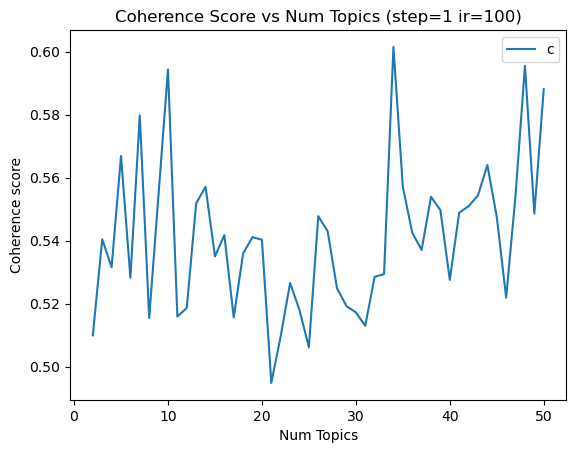

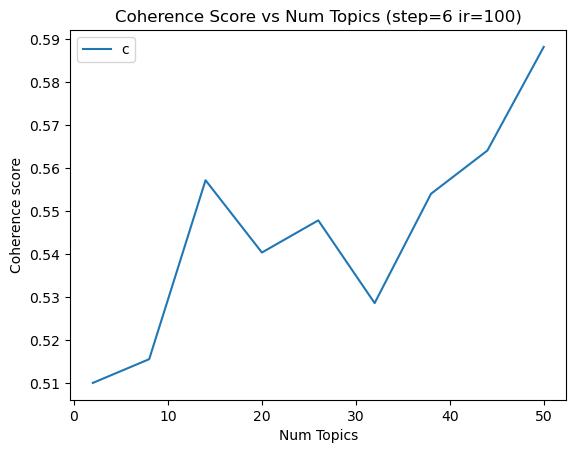


Itrations = 500
Num Topics = 2  has Coherence Value of 0.5279
Num Topics = 3  has Coherence Value of 0.5414
Num Topics = 4  has Coherence Value of 0.5303
Num Topics = 5  has Coherence Value of 0.5463
Num Topics = 6  has Coherence Value of 0.562
Num Topics = 7  has Coherence Value of 0.548
Num Topics = 8  has Coherence Value of 0.534
Num Topics = 9  has Coherence Value of 0.5269
Num Topics = 10  has Coherence Value of 0.5264
Num Topics = 11  has Coherence Value of 0.5555
Num Topics = 12  has Coherence Value of 0.5377
Num Topics = 13  has Coherence Value of 0.4934
Num Topics = 14  has Coherence Value of 0.5304
Num Topics = 15  has Coherence Value of 0.4998
Num Topics = 16  has Coherence Value of 0.4973
Num Topics = 17  has Coherence Value of 0.5251
Num Topics = 18  has Coherence Value of 0.4877
Num Topics = 19  has Coherence Value of 0.547
Num Topics = 20  has Coherence Value of 0.5191
Num Topics = 21  has Coherence Value of 0.5425
Num Topics = 22  has Coherence Value of 0.5081
Num Topi

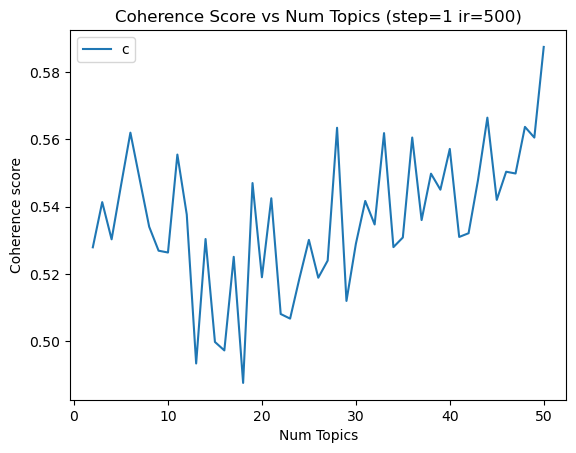

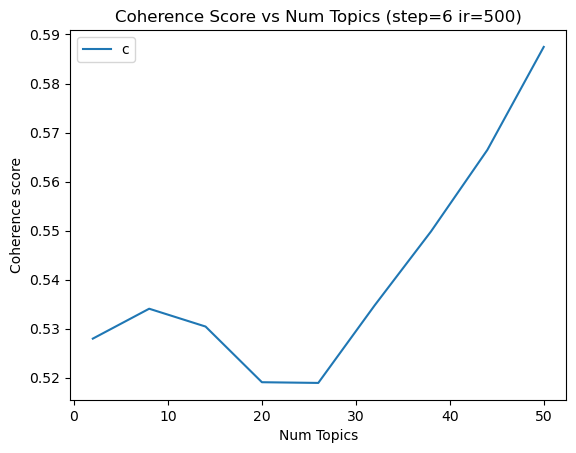


Itrations = 1000
Num Topics = 2  has Coherence Value of 0.5318
Num Topics = 3  has Coherence Value of 0.556
Num Topics = 4  has Coherence Value of 0.5939
Num Topics = 5  has Coherence Value of 0.5815
Num Topics = 6  has Coherence Value of 0.5583
Num Topics = 7  has Coherence Value of 0.5547
Num Topics = 8  has Coherence Value of 0.5549
Num Topics = 9  has Coherence Value of 0.5118
Num Topics = 10  has Coherence Value of 0.5251
Num Topics = 11  has Coherence Value of 0.5224
Num Topics = 12  has Coherence Value of 0.5603
Num Topics = 13  has Coherence Value of 0.56
Num Topics = 14  has Coherence Value of 0.543
Num Topics = 15  has Coherence Value of 0.5427
Num Topics = 16  has Coherence Value of 0.536
Num Topics = 17  has Coherence Value of 0.5264
Num Topics = 18  has Coherence Value of 0.5439
Num Topics = 19  has Coherence Value of 0.5209
Num Topics = 20  has Coherence Value of 0.5248
Num Topics = 21  has Coherence Value of 0.5249
Num Topics = 22  has Coherence Value of 0.5152
Num Topi

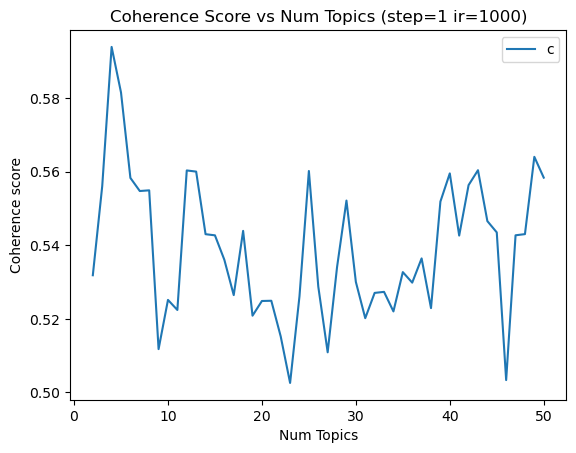

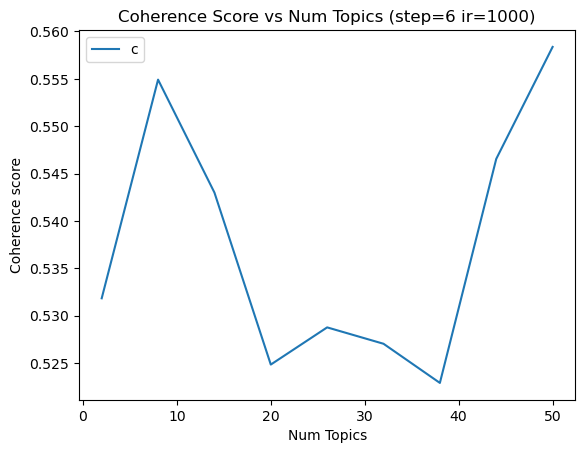


Itrations = 2000
Num Topics = 2  has Coherence Value of 0.4861
Num Topics = 3  has Coherence Value of 0.5685
Num Topics = 4  has Coherence Value of 0.5626
Num Topics = 5  has Coherence Value of 0.5283
Num Topics = 6  has Coherence Value of 0.6168
Num Topics = 7  has Coherence Value of 0.5185
Num Topics = 8  has Coherence Value of 0.5122
Num Topics = 9  has Coherence Value of 0.5616
Num Topics = 10  has Coherence Value of 0.5711
Num Topics = 11  has Coherence Value of 0.5044
Num Topics = 12  has Coherence Value of 0.5138
Num Topics = 13  has Coherence Value of 0.4981
Num Topics = 14  has Coherence Value of 0.5157
Num Topics = 15  has Coherence Value of 0.5344
Num Topics = 16  has Coherence Value of 0.523
Num Topics = 17  has Coherence Value of 0.5515
Num Topics = 18  has Coherence Value of 0.4988
Num Topics = 19  has Coherence Value of 0.5509
Num Topics = 20  has Coherence Value of 0.5213
Num Topics = 21  has Coherence Value of 0.5113
Num Topics = 22  has Coherence Value of 0.5183
Num 

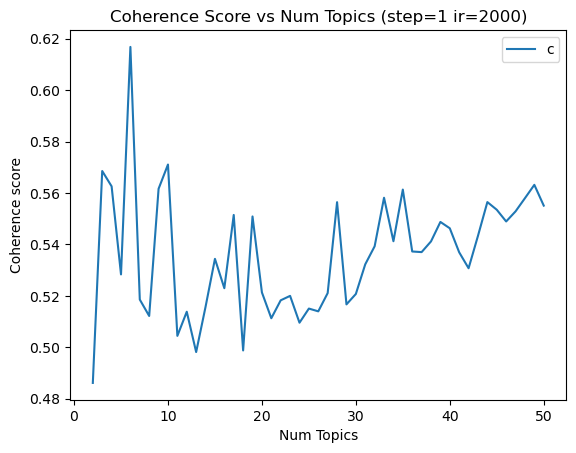

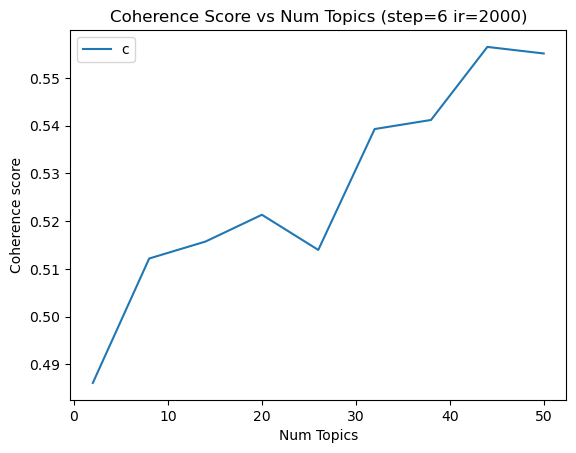

In [25]:
for i in range(len(ir_values)):
    ir = ir_values[i]
    coherence_values = all_coherence_values[i]
    x = range(start, limit, step)
    print("Itrations = {}".format(ir))
    for m, cv in zip(x, all_coherence_values[i]):
        print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    print()
    
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.title('Coherence Score vs Num Topics (step={} ir={})'.format(step, ir))
    plt.show()

    x_step = 6
    x = range(start, limit, x_step)
    plt.plot(x, coherence_values[::x_step])
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.title('Coherence Score vs Num Topics (step={} ir={})'.format(x_step, ir))
    plt.show()

    print()

In [26]:
# Initializing the LdaMallet model
ldamalletmodel35 = ldamallet.LdaMallet(mallet_path,
                    corpus=corpus,
                    num_topics=35,  
                    id2word=id2word,
                    alpha=50/35,  
                    iterations=2000) 

# Show Topics
pprint(ldamalletmodel.show_topics(formatted=False))

[('9: font_size',
  [('user', 0.03657908294693457),
   ('color', 0.03529108706852138),
   ('pick', 0.0285935085007728),
   ('return', 0.023956723338485315),
   ('react', 0.01983513652756311),
   ('game', 0.0190623390005152),
   ('style', 0.015971148892323546),
   ('extend', 0.014940752189592994),
   ('const', 0.014683153013910355),
   ('page', 0.013395157135497167)]),
 ('10: font_weight',
  [('file', 0.06415607985480944),
   ('task', 0.05517241379310345),
   ('set', 0.041379310344827586),
   ('solve', 0.032758620689655175),
   ('end', 0.024500907441016333),
   ('start', 0.02413793103448276),
   ('terminal', 0.018693284936479128),
   ('create', 0.018330308529945553),
   ('function', 0.017785843920145192),
   ('description', 0.017241379310344827)]),
 ('3: border',
  [('file', 0.03872171681828785),
   ('error', 0.034289713086074175),
   ('rustup_toolchain', 0.025192442267319804),
   ('lib_rustlib', 0.024725915558665733),
   ('rename_component', 0.023326335432703522),
   ('student', 0.0191

In [27]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamalletmodel35, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.506692540879343


In [28]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamallet.malletmodel2ldamodel(ldamalletmodel35), corpus, id2word)
vis

c:\Users\esagdic\anaconda3\envs\topic-analysis\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\esagdic\anaconda3\envs\topic-analysis\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\esagdic\anaconda3\envs\topic-analysis\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.002993  0.129686       1        1  24.750663
28     0.062727  0.072661       2        1   9.600814
12    -0.045171  0.271400       3        1   8.235707
21    -0.241775 -0.008919       4        1   7.349275
9      0.130448 -0.109035       5        1   6.234413
13    -0.290968  0.009487       6        1   5.427188
4     -0.127954 -0.194058       7        1   4.368239
11     0.136472  0.031400       8        1   4.349592
15     0.149874 -0.062961       9        1   2.985542
0     -0.083422  0.117273      10        1   2.202740
29     0.173980 -0.026471      11        1   2.042503
8      0.073539 -0.175928      12        1   1.845277
6     -0.205492  0.023413      13        1   1.534196
19     0.151899 -0.016553      14        1   1.494358
24     0.079485  0.105559      15        1   1.467511
18     0.077275 -0.073988      16        1   1.462283
16    -0.292929 -0.151365      17        1   1.387404
30     0.146358  0.011054      18        1   1.275333
14    -0.061347  0.142497      19        1   1.033423
17    -0.062456  0.142311      20        1   1.006543
7     -0.006925 -0.051364      21        1   1.001111
31     0.153807 -0.056655      22        1   0.993187
22    -0.039955  0.212124      23        1   0.981295
1     -0.043723  0.113893      24        1   0.898950
32    -0.084754  0.244306      25        1   0.878890
3      0.179077 -0.033305      26        1   0.758869
23     0.116177 -0.072694      27        1   0.739107
34    -0.291949 -0.158918      28        1   0.723276
26     0.142288 -0.127231      29        1   0.616590
25     0.127282 -0.107182      30        1   0.501124
5     -0.296006 -0.171362      31        1   0.445200
27     0.098327 -0.002144      32        1   0.431102
10    -0.022288  0.019605      33        1   0.388809
20     0.113537  0.066052      34        1   0.298348
33     0.081568 -0.112588      35        1   0.291136, topic_info=        Term         Freq        Total Category  logprob  loglift
91      file  2496.000000  2496.000000  Default  30.0000  30.0000
84     error  2107.000000  2107.000000  Default  29.0000  29.0000
107   import  2465.000000  2465.000000  Default  28.0000  28.0000
66     const  2584.000000  2584.000000  Default  27.0000  27.0000
77     datum  1723.000000  1723.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
172      run     4.697762   526.602814  Topic35  -4.5120   1.1198
187   system     4.203261   172.431349  Topic35  -4.6232   2.1250
423     work     3.956010   657.523045  Topic35  -4.6839   0.7259
229  develop     2.967008     9.616298  Topic35  -4.9715   4.6632
691  execute     2.967008   287.421268  Topic35  -4.9715   1.2657

[2843 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
6901      9  0.981418  a_mail_please
2287     16  1.337422      abijtdmfc
734       5  0.615437         access
734      15  0.050240         access
734      16  0.087920         access
...     ...       ...            ...
424      29  0.400017           year
778       2  0.995735        youtube
425       9  1.022311          zalgz
426       9  1.090465   zalgz_plugin
700       9  1.090465           zoom

[4423 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 29, 13, 22, 10, 14, 5, 12, 16, 1, 30, 9, 7, 20, 25, 19, 17, 31, 15, 18, 8, 32, 23, 2, 33, 4, 24, 35, 27, 26, 6, 28, 11, 21, 34])

In [29]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Store the topics, contributions, and keywords for each document in lists
    topics_data = []
    
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        if len(row_list) == 0:
            # Handle the case where a document doesn't have a topic distribution
            continue
        
        # Sort the topics by contribution and take the dominant topic
        row_list = sorted(row_list, key=lambda x: (x[1]), reverse=True)
        dominant_topic_num, dominant_prop_topic = row_list[0]
        
        # Get the topic keywords
        topic_keywords = ", ".join([word for word, prop in ldamodel.show_topic(dominant_topic_num)])
        
        # Append the data to the list
        topics_data.append((dominant_topic_num, id2word[dominant_topic_num], round(dominant_prop_topic, 4), topic_keywords))
    
    # Create a DataFrame from the collected data
    if topics_data:
        sent_topics_df = pd.DataFrame(topics_data, columns=['Dominant_Topic_Num', 'Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
    
    # Add original text to the end of the output
    if not sent_topics_df.empty:
        sent_topics_df['Text'] = pd.Series(texts)
    
    return sent_topics_df

In [45]:
df_topic_sents_keywords = format_topics_sentences(ldamalletmodel, corpus, data)

In [46]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic_Num', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# drop document_no column
df_dominant_topic = df_dominant_topic.drop(columns=['Document_No'])
# Show
df_dominant_topic.head(10)

,Dominant_Topic_Num,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,7,display,0.8822,"number, option, object, string, table, functio...",[ button Button ::-webkit-scrollbar { ...
1,5,clearbutton,0.8336,"error, datum, function, import, const, message...",[server.js // Required libraries import cors f...
2,4,bottom,0.3196,"user, image, make, issue, time, plugin, write,...",[write a readme file for this cli: import { pr...
3,11,height,0.4207,"file, task, script, src, change, create, main,...","[i have a pr for merging `develop` to `main`, ..."
4,3,border,0.5046,"file, error, rustup_toolchain, lib_rustlib, re...",[i got ``` ============================= test...
5,12,hidden,0.3672,"task, file, prompt, junior, ai, project, forma...",[Today when i check the github desktop of my w...
6,8,family,0.5080,"return, string, text, def, import, type, list,...","[img = np.fromfile(dph_files[0], dtype=np.uint..."
7,8,family,0.3157,"return, string, text, def, import, type, list,...","[Give me an list of User in python, User is a..."
8,11,height,0.4313,"file, task, script, src, change, create, main,...",[Write a function that can return the long des...
9,7,display,0.5568,"number, option, object, string, table, functio...",[ let urlParams = new URL(location.href); ...


In [52]:
# get the number of unique topics
unique_topics = df_dominant_topic['Dominant_Topic_Num'].unique()
print("Number of unique topics: {}".format(len(unique_topics)))

Number of unique topics: 16


In [32]:
# save to csv
df_dominant_topic.to_csv('./output/dominant_topics_16_first_prompts.csv')

In [47]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic_Num')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(10)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic", "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic,Topic_Perc_Contrib,Keywords,Text
0,0,absolute,0.9711,"import, task, file, component, const, frontend...",[# Working set src/frontend/App.jsx: ``` impor...
1,0,absolute,0.9616,"import, task, file, component, const, frontend...",[# Working set src/frontend/generatePrompt.js:...
2,0,absolute,0.9583,"import, task, file, component, const, frontend...",[# Working set src/frontend/App.jsx: ``` impor...
3,0,absolute,0.9575,"import, task, file, component, const, frontend...",[# Working set src/frontend/App.jsx: ``` impor...
4,0,absolute,0.9508,"import, task, file, component, const, frontend...",[# Working set src/frontend/App.jsx: ``` impor...
...,...,...,...,...,...
155,15,letter,0.9637,"file, task, const, prop, item, import, set, so...","[You are AI Junior, you code like Donald Knuth..."
156,15,letter,0.9636,"file, task, const, prop, item, import, set, so...","[You are AI Junior, you code like Donald Knuth..."
157,15,letter,0.9621,"file, task, const, prop, item, import, set, so...","[You are AI Junior, you code like Donald Knuth..."
158,15,letter,0.9557,"file, task, const, prop, item, import, set, so...","[You are AI Junior, you code like Donald Knuth..."


In [86]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic_Num'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]
topic_num_keywords = topic_num_keywords.drop_duplicates().reset_index(drop=True)
# topic_num_keywords = df_topic_sents_keywords['Dominant_Topic']
# unique_topics = topic_num_keywords['Dominant_Topic'].unique()

# Concatenate Column wise
df_dominant_topics_a = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics_a.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics_a.sort_values(by=['Dominant_Topic']).reset_index(drop=True)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,absolute,"import, task, file, component, const, frontend...",73,0.0542
1,block,"run, java, step, internal, internal_execution,...",74,0.0549
2,bold,"file, task, set, goal, change, create, script,...",70,0.0519
3,border,"file, error, rustup_toolchain, lib_rustlib, re...",234,0.1736
4,bottom,"user, image, make, issue, time, plugin, write,...",115,0.0853
5,clearbutton,"error, datum, function, import, const, message...",71,0.0527
6,container,"file, prompt, import, const, task, return, pat...",51,0.0378
7,display,"number, option, object, string, table, functio...",127,0.0942
8,family,"return, string, text, def, import, type, list,...",64,0.0475
9,font_size,"user, color, pick, return, react, game, style,...",84,0.0623


In [35]:
# save to csv
sent_topics_sorteddf_mallet.to_csv('./output/top10_sentences_16_first_prompts.csv')


In [36]:
df_topic_sents_keywords = format_topics_sentences(ldamalletmodel35, corpus, data)

In [37]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic_Num', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# drop document_no column
df_dominant_topic = df_dominant_topic.drop(columns=['Document_No'])
# Show
df_dominant_topic.head(10)

,Dominant_Topic_Num,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,11,height,0.9245,"color, style, react, extend, text, container, ...",[ button Button ::-webkit-scrollbar { ...
1,2,bold,0.7562,"server, datum, const, socket, port, error, fun...",[server.js // Required libraries import cors f...
2,24,position,0.3733,"return, def, import, text, message, type, key,...",[write a readme file for this cli: import { pr...
3,1,block,0.6617,"main, const, src, error, command, web, git, er...","[i have a pr for merging `develop` to `main`, ..."
4,24,position,0.4254,"return, def, import, text, message, type, key,...",[i got ``` ============================= test...
5,4,bottom,0.4110,"task, junior, file, ai, prompt, project, model...",[Today when i check the github desktop of my w...
6,15,letter,0.2648,"image, plugin, type, user, email, code, genera...","[img = np.fromfile(dph_files[0], dtype=np.uint..."
7,29,width_px,0.4099,"health, int, literacy, buffer, disease, includ...","[Give me an list of User in python, User is a..."
8,1,block,0.2971,"main, const, src, error, command, web, git, er...",[Write a function that can return the long des...
9,28,width,0.9236,"return, string, word, replace, text, type_scra...",[ let urlParams = new URL(location.href); ...


In [38]:
# save in csv
df_dominant_topic.to_csv('./output/dominant_topics_35_first_prompts.csv')

In [39]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic_Num')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(10)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic", "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic,Topic_Perc_Contrib,Keywords,Text
0,0,absolute,0.6043,"terminal, import, const, creategitrepo, term, ...","[You are AI Junior, you code like Donald Knuth..."
1,0,absolute,0.5490,"terminal, import, const, creategitrepo, term, ...","[You are AI Junior, you code like Donald Knuth..."
2,0,absolute,0.5412,"terminal, import, const, creategitrepo, term, ...","[You are AI Junior, you code like Donald Knuth..."
3,0,absolute,0.5407,"terminal, import, const, creategitrepo, term, ...","[You are AI Junior, you code like Donald Knuth..."
4,0,absolute,0.5350,"terminal, import, const, creategitrepo, term, ...","[You are AI Junior, you code like Donald Knuth..."
...,...,...,...,...,...
340,34,api,0.8147,"file, task, change, create, script, plan, goal...",[# Working set ``` ./ .DS_Store .git/... .g...
341,34,api,0.7768,"file, task, change, create, script, plan, goal...",[# Working set ``` ./ .DS_Store .git/... .g...
342,34,api,0.7512,"file, task, change, create, script, plan, goal...",[# Working set src/doc/buildDoc.js: ``` import...
343,34,api,0.7224,"file, task, change, create, script, plan, goal...",[# Working set src/vite.config.js: ``` import ...


In [40]:
# save in csv
sent_topics_sorteddf_mallet.to_csv('./output/top10_sentences_35_first_prompts.csv')